<a href="https://colab.research.google.com/github/s20881/pum_projekt/blob/main/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from IPython.core.pylabtools import figsize
import os
from google.colab import drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/My Drive/PUM/projekt')
path = Path('/content/drive/My Drive/PUM/projekt')

Mounted at /content/drive


In [9]:
classes = ['chair', 'table']
path = Path('train')
if not path.exists():
    path.mkdir()
    for o in classes:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        urls = search_images_ddg(f' {o} furniture', max_images=100)
        download_images(dest, urls=urls)

In [10]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [11]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(max_rotate=2.0)
)
dls = data.dataloaders(path, bs = 32, num_workers = 0)

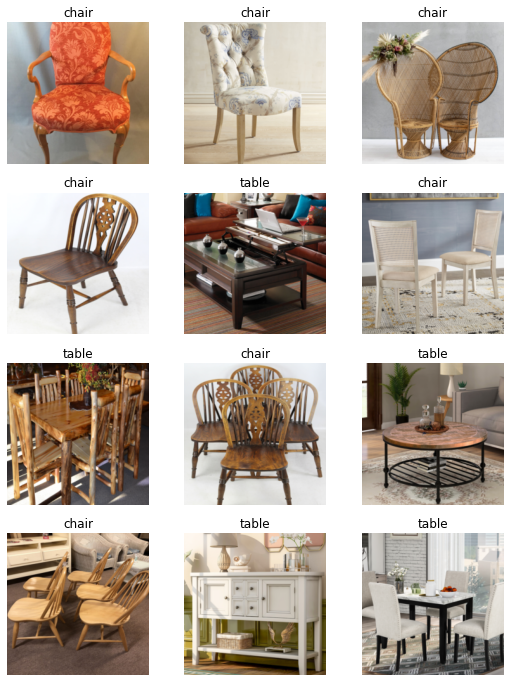

In [12]:
dls.valid.show_batch(max_n=12, nrows=4)

In [13]:
learn = vision_learner(dls, alexnet, metrics=accuracy)
learn.fit(2)
learn.save('stage-1')
learn.export(fname='model.pkl')

epoch,train_loss,valid_loss,accuracy,time
0,1.054254,1.936942,0.666667,00:29
1,0.931863,1.272396,0.743590,00:29
